In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('数据科学实践Data/Grad-Line.xlsx')

In [3]:
class linear_regression:
    def __init__(self, data):
        self.X = data.drop(columns=['Y house price of unit area', 'No']).values
        X_mean, X_std = self.X.mean(0), self.X.std(0)
        self.X = (self.X - X_mean) / X_std
        self.y = data['Y house price of unit area'].values
        self.num_samples, self.num_colums = self.X.shape
        self.W, self.b = np.random.uniform(-1, 1, self.num_colums), np.random.uniform(-1, 1, 1)

    def get_loss(self):
        y_hat = np.dot(self.X, self.W) + self.b
        mse = np.sum((y_hat - self.y) ** 2) / self.num_samples
        dw = 2 * np.dot(self.X.T, (y_hat - self.y)) / self.num_samples
        db = 2 * np.sum(y_hat - self.y) / self.num_samples
        return mse, dw, db
    
    def train(self, num_epochs, alpha):
        loss_list = []
        for _ in range(num_epochs):
            mse, dw, db = self.get_loss()
            self.W -= alpha * dw
            self.b -= alpha * db
            loss_list.append(mse)
        return loss_list

In [4]:
optimizer = linear_regression(data)

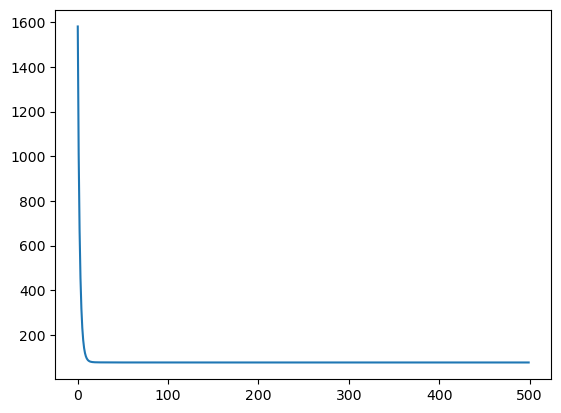

In [5]:
num_epochs, alpha = 500, 0.1
loss_list = optimizer.train(num_epochs, alpha)
plt.plot(loss_list)

In [6]:
loss_list[-1], optimizer.W, optimizer.b

(77.12902119719598,
 array([ 1.45024408, -3.06880288, -5.65688216,  3.33424474,  2.79474754,
        -0.19052008]),
 array([37.98019324]))

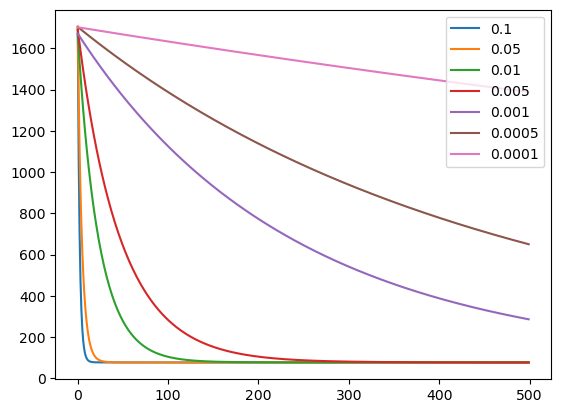

In [7]:
alpha_range = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
list_ = []

for alpha in alpha_range:
    optimizer = linear_regression(data)
    list_.append(optimizer.train(500, alpha))
for i, loss_list in enumerate(list_):
    plt.plot(loss_list, label=alpha_range[i])
plt.legend()
plt.show()



In [8]:
num_epochs, alpha = 500, 0.01

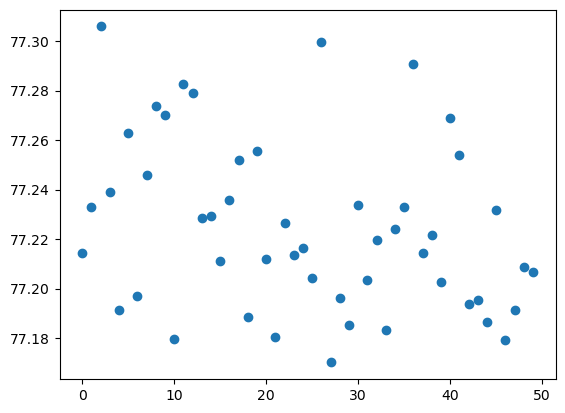

In [9]:
num_runs, list_ = 50, []
for _ in range(num_runs):
    optimizer = linear_regression(data)
    list_.append(optimizer.train(num_epochs, alpha)[-1])

plt.scatter(list(range(num_runs)), list_)



In [13]:
min(list_), optimizer.W, optimizer.b

(77.17015463004773,
 array([ 1.42404653, -3.07550354, -5.09651833,  3.44474365,  2.92601689,
         0.22018985]),
 array([37.97861721]))

In [10]:
# 最小二乘法
X = data.drop(columns=['Y house price of unit area', 'No']).values
y = data['Y house price of unit area'].values
X_b = np.c_[np.ones((X.shape[0], 1)), X]
W = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


In [14]:
np.sum((X_b.dot(W) - y) ** 2) / X_b.shape[0], W[1:], W[0]

(77.12902119719645,
 array([ 5.14901719e+00, -2.69696735e-01, -4.48750826e-03,  1.13332498e+00,
         2.25470143e+02, -1.24290618e+01]),
 -14441.982575572125)